In [18]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\crop_yield_cleaned.xls")

print("Shape:", df.shape)
print(df.head())


Shape: (242361, 8)
                    state_name district_name  crop_year       season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  crop    area  production  yield_t_per_ha  
0             Arecanut  1254.0      2000.0        1.594896  
1  Other Kharif pulses     2.0         1.0        0.500000  
2                 Rice   102.0       321.0        3.147059  
3               Banana   176.0       641.0        3.642045  
4            Cashewnut   720.0       165.0        0.229167  


In [19]:
cat_cols = df.select_dtypes(include=["object"]).columns
print("Categorical columns:", list(cat_cols))

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

df.head()


Categorical columns: ['state_name', 'district_name', 'season', 'crop']


,state_name,district_name,crop_year,season,crop,area,production,yield_t_per_ha
0,0,427,2000,1,2,1254.0,2000.0,1.594896
1,0,427,2000,1,74,2.0,1.0,0.500000
2,0,427,2000,1,95,102.0,321.0,3.147059
3,0,427,2000,4,7,176.0,641.0,3.642045
4,0,427,2000,4,22,720.0,165.0,0.229167


In [20]:
X = df.drop(columns=["yield_t_per_ha"])
y = df["yield_t_per_ha"]

print("Feature columns:", list(X.columns))
print("Target:", "yield_t_per_ha")


Feature columns: ['state_name', 'district_name', 'crop_year', 'season', 'crop', 'area', 'production']
Target: yield_t_per_ha


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (193888, 7) Test size: (48473, 7)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prediction
y_pred_lr = lr.predict(X_test)
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

print("Linear Regression R²:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Linear Regression R²: 0.16876102908415103
MAE: 74.34465822738497
MSE: 449680.48610804946
RMSE: 670.5821993671242


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load cleaned dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\crop_yield_cleaned.xls")

# Encode categorical features
cat_cols = ["state_name", "district_name", "season", "crop"]
encoders = {}
for col in cat_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Features and Target
X = df.drop(columns=["yield_t_per_ha"])
y = df["yield_t_per_ha"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
df

,state_name,district_name,crop_year,season,crop,area,production,yield_t_per_ha
0,0,427,2000,1,2,1254.0,2000.0,1.594896
1,0,427,2000,1,74,2.0,1.0,0.500000
2,0,427,2000,1,95,102.0,321.0,3.147059
3,0,427,2000,4,7,176.0,641.0,3.642045
4,0,427,2000,4,22,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
242356,32,471,2014,3,95,306.0,801.0,2.617647
242357,32,471,2014,3,102,627.0,463.0,0.738437
242358,32,471,2014,4,106,324.0,16250.0,50.154321
242359,32,471,2014,5,95,279151.0,597899.0,2.141848


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

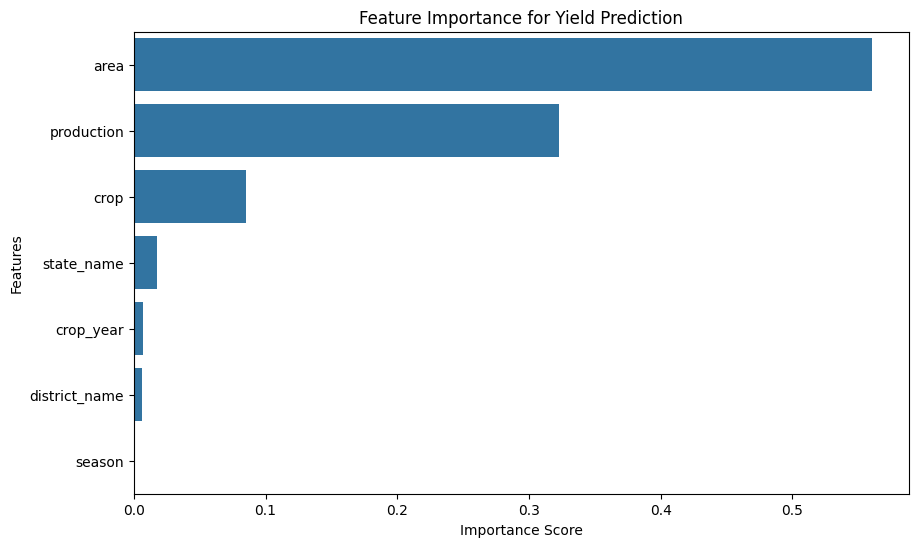

In [33]:
# Feature Importance
importances = rf_model.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance for Yield Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


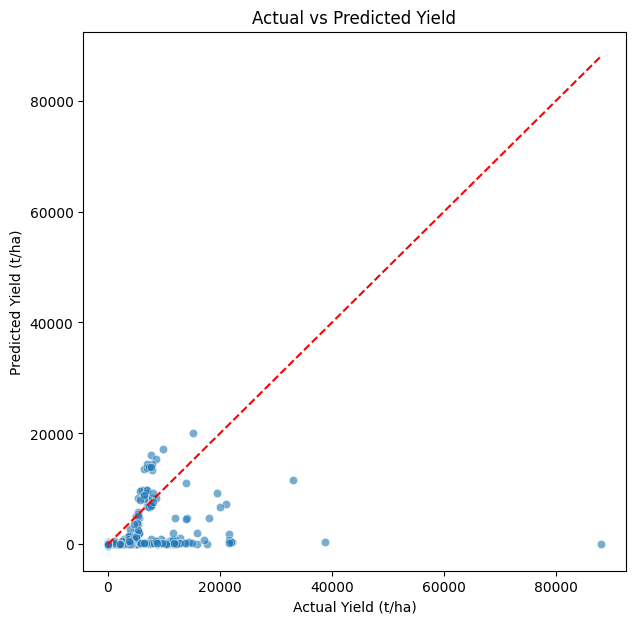

In [34]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Yield")
plt.xlabel("Actual Yield (t/ha)")
plt.ylabel("Predicted Yield (t/ha)")
plt.show()


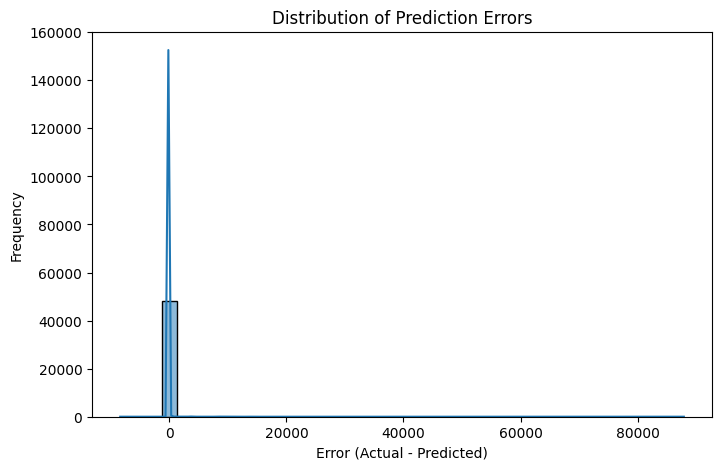

In [35]:
errors = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(errors, bins=40, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()
